## Assignment A3a: Signals and Noise

#### John Mays, (jkm100)

In [1]:
# Some important imports
import math
import numpy as np
import matplotlib.pyplot as plt
import sys

purples = ["#0a0612", "#392249", "#482980", "#673ab7",
           "#7a52aa", "#9779bd", "#b59fd0", "#d3c5e3"]

In [24]:
sys.path.insert(1, '/Users/johnmays/Documents/GitHub/CSDS_364_HW/A1')
# import A1b_code
from A1b_code import *

### 1. Continuous signals and sampling

### 1a. Sampled functions

In [37]:
def plot_sampled_function(g=sinewave, fs=1, f=1.0, tlim=(0, 2*math.pi), tscale=1, tunits="secs"):
    # all values are given in seconds; the time scale will alter the plot to show x-axis values on the order of the tscale
    t = np.linspace(tlim[0], tlim[1], 2001)
    signal = g(t=t, f=f)
    sampled_t = np.linspace(tlim[0], tlim[1], int(((tlim[1]-tlim[0])*fs)+1))
    sampled_signal = g(t=sampled_t, f=f)
    plt.figure(figsize=(8, 5), dpi=72)
    plt.plot(t*tscale, signal, c=purples[6], label="signal")
    markers, stems, base = plt.stem(sampled_t*tscale, sampled_signal, linefmt=purples[2], basefmt=" ", label="sampled signal")
    plt.setp(markers, 'color', purples[2])
    plt.setp(markers, 'marker', 'o')
    plt.xlim(tlim[0]*tscale, tlim[1]*tscale)
    plt.xlabel("Time ({units})".format(units=tunits))
    plt.ylabel("Amplitude")
    plt.title("Sampled Signal with Original Signal")
    plt.legend()
    plt.show()
    return None

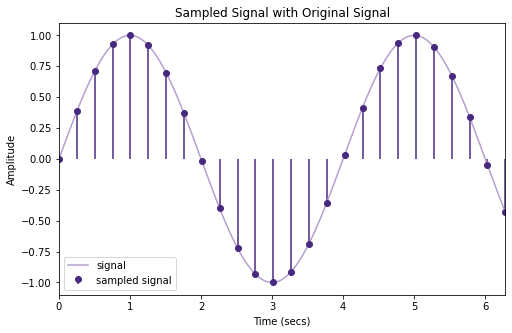

In [39]:
plot_sampled_function(g=sinewave, f= 0.25, fs=4.0)

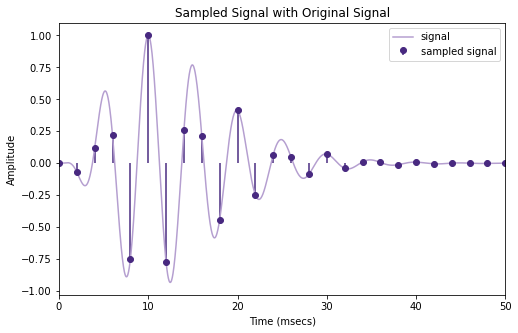

In [28]:
plot_sampled_function(g=gammatone, f=200, fs=500, tlim=(0,0.05), tscale=10**3, tunits="msecs")

### 1b. The Nyquist frequency and aliasing

##### 1. A sine wave below Nyquist at a frequency that shows a few samples per period which unevenly distributed.

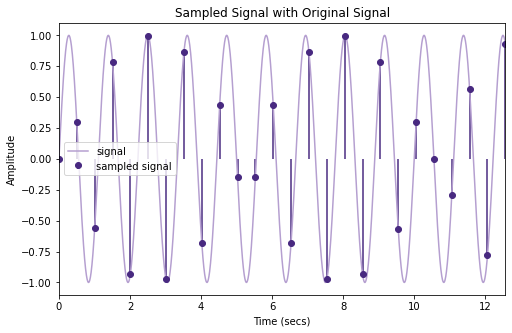

In [29]:
plot_sampled_function(g=sinewave, f= 0.9, fs=2.0, tlim=(0, 4*math.pi))

##### 2. sine at Nyquist

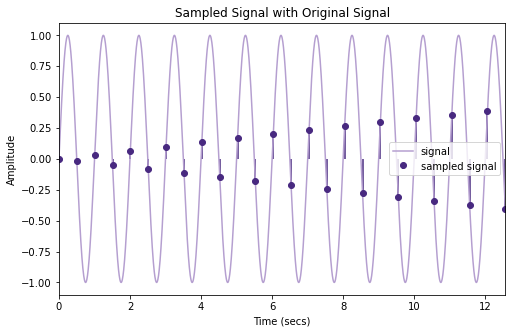

In [30]:
plot_sampled_function(g=sinewave, f= 1.0, fs=2.0, tlim=(0, 4*math.pi))

##### 3. cosine at Nyquist

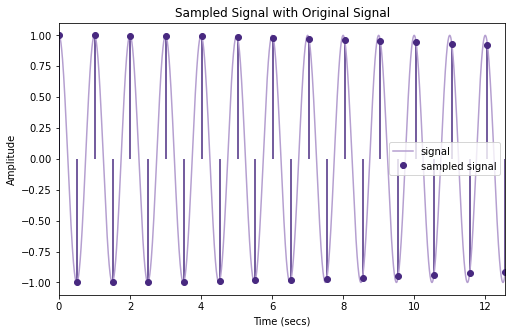

In [31]:
plot_sampled_function(g=cosinewave, f= 1.0, fs=2.0, tlim=(0, 4*math.pi))

##### 4. cosine sampled above Nyquist frequency that clearly shows aliasing

What does it mean to sample just above the Nyquist frequency if the Nyquist frequency is solely determined by the sampling frequency?  I am going to assume it was meant that the frequency of the actual wave should be just above the Nyquist frequency.

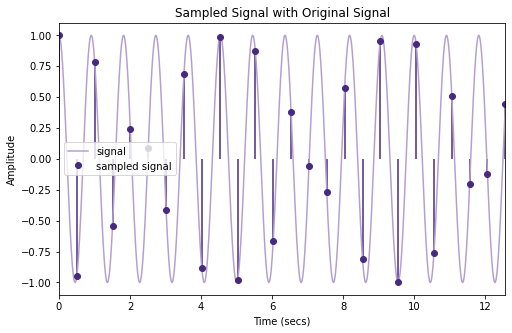

In [32]:
plot_sampled_function(g=cosinewave, f= 1.1, fs=2.0, tlim=(0, 4*math.pi))

### 2. Signals

### 2a. Delta and step functions

In [41]:
def delta(t, fs=1):
    center_time_val = 0
    signal = []
    for time_val in t:
        if (time_val >= center_time_val - 1/(2*fs)) and (time_val < center_time_val + 1/(2*fs)):
            signal.append(1)
        else:
            signal.append(0)
    return signal

In [42]:
def u(t):
    center_time_val = 0
    signal = []
    for time_val in t:
        if time_val >= 0:
            signal.append(1)
        else:
            signal.append(0)
    return signal

### 2b. `gensignal`

In [40]:
gensignal(t, g, tau=0.025, T=0.1):
    signal = []
    for t_val in t:
        if t_val < tau or t_val >= T + tau:
            signal.append(0)
        else:
            signal.append(g(t_val-tau))

In [25]:
t=np.linspace(-1,1,21)
gensignal(t, g=)

array([ 0.00000000e+00, -2.44929360e-16, -4.89858720e-16, -7.34788079e-16])

### 3. Noise and SNR


### 3a. `energy`, `power`, and `snr`

### 3b. Noisy signals

### 3c. Noise level specified by SNR

### 3d. Estimating SNR

### 4. Grand synthesis